# Retail Transaction Analysis using Machine Learning - Josua Muliawan

## Importing Packages

First We import the needed package

In [313]:
# IMPORTING PACKAGES
import datetime as dt
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

#Loading data
data=pd.read_csv('ML_2_Fellow.csv',delimiter=',', encoding='iso-8859-1')

## Cleaning the Dataset

To get a good anlysis, frist thing we need to do is cleaning the data. There are various things to look for, such as :
- Missing Values (NaN)
- Duplicated Row(s)
- Invalid Value (wrong name, etc)

We'll use .info() function to get quick info of our data

In [314]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB
None


After this, we should check type of each column to determine if it's already correct or not

In [315]:
print(data.describe())

print(data.dtypes)

              Jumlah   Harga_Satuan  Kode_Pelanggan
count  535874.000000  535874.000000   403182.000000
mean        9.587927       4.636533    15287.687868
std       153.292222      97.302232     1714.009551
min    -74215.000000  -11062.060000    12346.000000
25%         1.000000       1.250000    13952.000000
50%         3.000000       2.080000    15152.000000
75%        10.000000       4.130000    16791.000000
max     74215.000000   38970.000000    18287.000000
Kode_Bayar            object
Kode_Barang           object
Barang                object
Jumlah               float64
Tanggal_Transaksi     object
Harga_Satuan         float64
Kode_Pelanggan       float64
Negara                object
dtype: object


We can see that "Tanggal_Transaksi" type is still string. We'll need to change it to datetime type using the syntax below

In [316]:
data['Tanggal_Transaksi']=pd.to_datetime(data['Tanggal_Transaksi'])

### Dealing with duplicates

Next, we will check if our data has duplicate(s) in it. This can be done using .duplicated() function on pandas

In [317]:
data[data.duplicated()]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1.0,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1.0,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1.0,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1.0,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1.0,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1.0,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1.0,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1.0,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1.0,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Turns out there's more than 5 thousand entry that is a duplicate. We can clean this by subsetting only the row that is not a duplicate. This can be done using .duplicated() function

In [318]:
data=data[~data.duplicated()]
data.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dealing with Missing Values

Upon closer inspection, there's an anomaly with the data, where rows with most of it's value missing turn out having error in parsing. All of the information gets jumbled in one column (Kode_Bayar)

In [319]:
data[data['Kode_Pelanggan'].isnull()&data['Kode_Barang'].isnull()&data['Negara'].isnull()]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaT,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaT,NaN,NaN,NaN
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaT,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaT,NaN,NaN,NaN
1014,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541379,"581498,22041,""RECORD FRAME 7"""" SINGLE SIZE "",2...",NaN,NaN,NaN,NaT,NaN,NaN,NaN
541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaT,NaN,NaN,NaN
541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaT,NaN,NaN,NaN
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [320]:
print(data.isnull().sum())
print(data.shape)

Kode_Bayar                0
Kode_Barang            5989
Barang                 7443
Jumlah                 5989
Tanggal_Transaksi      5989
Harga_Satuan           5989
Kode_Pelanggan       138638
Negara                 5989
dtype: int64
(536641, 8)


There's a lot of missing values! This wont end well when we process it in the future. So it's best practice to handle it first, for now let's just drop rows with missing value to make our lives easier

In [321]:
data.dropna(inplace=True)
print(data.isnull().sum())
print(data.shape)

Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64
(398003, 8)


### Dealing with Incorrect Format

If we check closely, there's some 'Barang' entry that is not a product (written in lowercase), we can check 1st to see what is the correct format of product name

In [322]:
pd.unique(data['Barang'])

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'SILVER AND BLACK ORBIT NECKLACE',
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

Our suspicion is correct, since the item naming format is in uppercase. We can see that all item that's in lowercase turns out to be error/irrelevant data. We can drop this data

In [323]:
data=data[data['Barang'].str.isupper().fillna(False)].reset_index(drop=True)
data

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
396064,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
396065,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
396066,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
396067,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France


We also discovered that in the list of country, there's 'Unspecified' value, to create a good analysis, it has to be removed

In [324]:
data=data[data['Negara']!='Unspecified']
data['Negara'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

List of country above is correct at last. Aftar all this pre-processing, we can proceed with analysis of the data

## Q1. What items customers buy the most and are there any items we should ignore?


This is a pretty straightforward question, and we can sort based on number of purchase to determine most bought item

In [353]:
summed_data=data.groupby(['Barang'])['Jumlah'].agg(Total='sum')
#non_neg_data=summed_data[summed_data['Total']>=0]
most_bought=non_neg_data.sort_values(by='Total',ascending=False).reset_index()

most_bought.head(5)



,Barang,Total
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119.0
1,JUMBO BAG RED RETROSPOT,44963.0
2,ASSORTED COLOUR BIRD ORNAMENT,35193.0
3,WHITE HANGING HEART T-LIGHT HOLDER,34128.0
4,PACK OF 72 RETROSPOT CAKE CASES,33362.0


To determine which product we should ignore, we can see that from least bought item

In [326]:
least_bought=non_neg_data.sort_values(by='Total',ascending=True).reset_index()

least_bought.head(5)

,Barang,Total
0,DIAMANTE HAIR GRIP PACK/2 CRYSTAL,0.0
1,DIAMANTE HAIR GRIP PACK/2 PERIDOT,0.0
2,HANGING RIDGE GLASS T-LIGHT HOLDER,0.0
3,WHITE BEADED GARLAND STRING 20LIGHT,0.0
4,DAISY HAIR COMB,0.0


## Q2. What is our strategy to increase sales based on our export destination countries?

If we want to increase our sales based on export, we can try to put more effort on marketing in products that are well liked in each countries. So the best way to start if find out product preference in each country

In [ ]:
#subset_2=data[['Barang','Negara','Jumlah']]
#subset_2_summed=subset_2.groupby(['Negara','Barang'],as_index=False).sum()
#subset_2_summed.sort_values(['Negara','Jumlah'],ascending=False).groupby('Negara').head(3).reset_index()

In [354]:
subset_2=data[['Barang','Negara','Jumlah']]

subset_2_summed=subset_2.groupby(['Negara','Barang'],as_index=False).sum()
final=subset_2_summed.set_index('Barang').groupby('Negara')['Jumlah'].nlargest(3).reset_index()

final

,Negara,Barang,Jumlah
0,Australia,MINI PAINT SET VINTAGE,2916.0
1,Australia,RABBIT NIGHT LIGHT,1884.0
2,Australia,RED HARMONICA IN BOX,1704.0
3,Austria,SET 12 KIDS COLOUR CHALK STICKS,288.0
4,Austria,MINI JIGSAW PURDEY,240.0
...,...,...,...
103,United Arab Emirates,BIG DOUGHNUT FRIDGE MAGNETS,72.0
104,United Arab Emirates,BLUE PAISLEY TISSUE BOX,36.0
105,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,47886.0
106,United Kingdom,JUMBO BAG RED RETROSPOT,40777.0


From the table above we can see which products do each countries likes. For example in Australia, Mini Paint Set Vintage is quite popular. So we can try to capitalize on it. 

## Q3. Do customer segmentation appropriately. Please explain in detail and completely

In [332]:
#Prepare the data for analysis
subset_3=data
subset_3['Total_Beli']=subset_3['Harga_Satuan']*subset_3['Jumlah']
subset_3=data[['Kode_Bayar','Kode_Pelanggan','Tanggal_Transaksi','Total_Beli']].dropna()
subset_3.head()


<ipython-input-332-476ac57f2072>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_3['Total_Beli']=subset_3['Harga_Satuan']*subset_3['Jumlah']


,Kode_Bayar,Kode_Pelanggan,Tanggal_Transaksi,Total_Beli
0,536365,17850.0,2010-12-01 08:26:00,15.30
1,536365,17850.0,2010-12-01 08:26:00,20.34
2,536365,17850.0,2010-12-01 08:26:00,22.00
3,536365,17850.0,2010-12-01 08:26:00,20.34
4,536365,17850.0,2010-12-01 08:26:00,20.34


### RFM

Since there is no personal information of the customers, we can start analysing using the buying behavior. Analysis of buying behaviour is usually done using RFM Analysis. To quote Mr. Avinash Navlani : 

__"RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions."__


In [333]:
#PRESENT = dt.datetime("2021,6,30")
PRESENT=pd.to_datetime('today').normalize()
rfm= subset_3.groupby('Kode_Pelanggan').agg({'Tanggal_Transaksi': lambda date: (PRESENT - date.max()).days,
                                        'Kode_Bayar': lambda num: len(num),
                                        'Total_Beli': lambda price: price.sum()})

In [334]:
rfm

,Tanggal_Transaksi,Kode_Bayar,Total_Beli
Kode_Pelanggan,,,
12346.0,3816,2,0.00
12347.0,3493,181,4299.80
12348.0,3566,31,1797.24
12349.0,3509,73,1757.55
12350.0,3801,17,334.40
...,...,...,...
18280.0,3768,10,180.60
18281.0,3671,7,80.82
18282.0,3498,13,176.60


We'll need to rename the columns to fit it better 

In [335]:
rfm.columns=['recency','freq','buy_power']
rfm['buy_power'] = rfm['buy_power'].astype(int)

In [336]:
rfm.dtypes

recency      int64
freq         int64
buy_power    int32
dtype: object

Customers with the lowest recency, highest frequency and buying power are considered as top customers.

In [337]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['freq'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['buy_power'], 4, ['4','3','2','1'])

rfm.head()

,recency,freq,buy_power,r_quartile,f_quartile,m_quartile
Kode_Pelanggan,,,,,,
12346.0,3816,2,0,4,4,4
12347.0,3493,181,4299,1,1,1
12348.0,3566,31,1797,3,3,1
12349.0,3509,73,1757,2,2,1
12350.0,3801,17,334,4,4,3


In [338]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,freq,buy_power,r_quartile,f_quartile,m_quartile,RFM_Score
Kode_Pelanggan,,,,,,,
12346.0,3816,2,0,4,4,4,444
12347.0,3493,181,4299,1,1,1,111
12348.0,3566,31,1797,3,3,1,331
12349.0,3509,73,1757,2,2,1,221
12350.0,3801,17,334,4,4,3,443


In [339]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4356 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   recency     4356 non-null   int64   
 1   freq        4356 non-null   int64   
 2   buy_power   4356 non-null   int32   
 3   r_quartile  4356 non-null   category
 4   f_quartile  4356 non-null   category
 5   m_quartile  4356 non-null   category
 6   RFM_Score   4356 non-null   object  
dtypes: category(3), int32(1), int64(2), object(1)
memory usage: 166.5+ KB


Our customer has been segmentated into 64 different category. Lower r equals better customer, while higher f and m equals better customer

### K-Means Clustering

After successfully putting cateogry on each customer, we can proceed with clustering the customer using K-Means algorithm. 

In [340]:
rfm_data=rfm[['r_quartile' ,'f_quartile' ,'m_quartile']]
rfm_data

,r_quartile,f_quartile,m_quartile
Kode_Pelanggan,,,
12346.0,4,4,4
12347.0,1,1,1
12348.0,3,3,1
12349.0,2,2,1
12350.0,4,4,3
...,...,...,...
18280.0,4,4,4
18281.0,4,4,4
18282.0,1,4,4


For our first trial, we'll try to create K-Means model with 3 cluster, then evaluate later if more cluster produce better result

In [341]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=3, max_iter=300, random_state=42)

In [342]:
kmeans.fit(rfm_data)

KMeans(init='random', n_clusters=3, random_state=42)

In [343]:
kmeans.cluster_centers_

array([[3.60364063, 3.34997064, 3.28772754],
       [1.83415706, 1.43218012, 1.44755629],
       [1.64182692, 3.15865385, 3.19471154]])

In [344]:
kmeans.n_iter_

6

In [345]:
kmeans.labels_[:35]

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1,
       0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0])

In [346]:
rfm_data['klaster'] = kmeans.labels_
rfm_data['klaster'].unique()

<ipython-input-346-111843f4bc14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['klaster'] = kmeans.labels_


array([0, 1, 2])

From the result above we can see that the customer has been successfully segmentated into 3 category. To evaluate our model, we will be using Davies Bouldin Score (lower score means betterr segmentation)

In [347]:
from sklearn.metrics import davies_bouldin_score 
labels = kmeans.labels_ 
print(davies_bouldin_score(rfm_data, labels)) 

0.7991075465285532


Not bad for first try, now let's see if increasing the number of cluster to 4 can improve our model

In [348]:
#trying 4 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=4,n_init=10, max_iter=300, random_state=42)
kmeans.fit(rfm_data)
labels = kmeans.labels_ 
print(davies_bouldin_score(rfm_data, labels)) 

0.9291359557450112


From above evaluation, we can see that it's better to cluster with 3 cluster (better davies bouldin score)

## Q4.Hidden Insight?

We would like to know how much each country contribute to our income. The simplest way to do this is by calculating how big is the transaction in each country 

In [350]:
dataset_4=data[['Negara','Total_Beli']]
ranking_buy=dataset_4.groupby('Negara').sum()['Total_Beli'].sort_values(ascending=False).reset_index()
ranking_buy

,Negara,Total_Beli
0,United Kingdom,6.754785e+06
1,Netherlands,2.835511e+05
2,EIRE,2.496449e+05
3,Germany,2.204102e+05
4,France,1.961262e+05
5,Australia,1.352262e+05
6,Spain,5.737425e+04
7,Switzerland,5.548936e+04
8,Belgium,4.063924e+04
9,Sweden,3.619865e+04


Turns out we got huge customer base in UK, followed by Netherlands and Ireland (EIRE). To visualize this better, we can use seaborn to plot number of purchases in each country

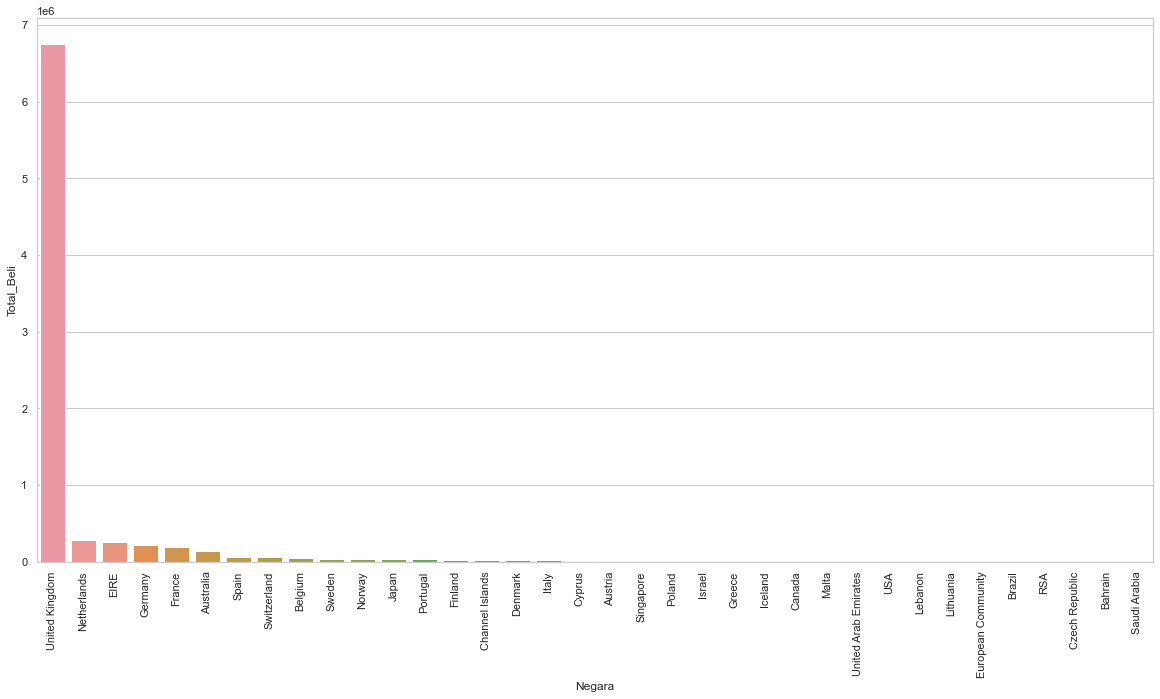

In [351]:
sb.set_theme(style="whitegrid")
ax = sb.barplot(x="Negara", y="Total_Beli", data=ranking_buy)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()